In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

import pyrepseq.plotting as pp

plt.style.use('bmh')

In [2]:
df = pd.read_csv('../data/compairr_benchmark.csv', index_col=0)
df = df[df['n_repertoire']>1]
df.head()

,runtime,algorithm,n_sequence,distance,measure,n_repertoire
2,30.531491,SymDel lookup,407713,1,hamming,2
3,1.710112,Compairr,407713,1,hamming,2
4,64.389258,SymDel lookup,765218,1,hamming,4
5,4.095441,Compairr,765218,1,hamming,4
6,177.064740,SymDel lookup,1601656,1,hamming,8


In [3]:
algorithms = ['Compairr', 'SymDel lookup', 'XTNeighbor-streaming']
algorithm_labels = {
                    'Compairr' : 'CompAIRR (CPU)',
                    'SymDel lookup' : 'SymDel lookup (CPU)',
                    'XTNeighbor-streaming' : 'XTNeighbor-streaming (GPU)'
                   }

Compairr 1 1.85, 0.06
SymDel lookup 1 1.46, 0.05
XTNeighbor-streaming 1 1.03, 0.06
Compairr 2 1.47, 0.05
SymDel lookup 2 1.46, 0.04
XTNeighbor-streaming 2 1.29, 0.02


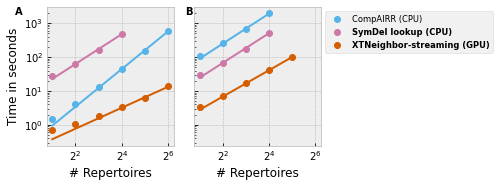

In [5]:
fig, axes = plt.subplots(figsize=(6.8, 2.4), ncols=2, sharey=True, sharex=True)
for d in [1, 2]:
    for index, algorithm in enumerate(algorithms):
        data = df[(df['distance']==d) & (df['algorithm']==algorithm)]
        mean = data.groupby('n_repertoire').mean(numeric_only=True)
        x, y = mean.index, mean['runtime']

        slope, intercept, r, p, se = scipy.stats.linregress(np.log(x[-3:]), np.log(y[-3:]))
        print(algorithm, d, f'{slope:.3}, {se:.1}')
        l, = axes[d-1].plot(x, y, 'o',
                label=algorithm_labels[algorithm],
                color=f'C{6-index}')
        axes[d-1].plot(x, np.exp(slope*np.log(x)+intercept), '-', color=l.get_color())
    axes[d-1].set_yscale('log')
    axes[d-1].set_xscale('log', base=2)
    axes[d-1].set_xlabel('# Repertoires')
axes[0].set_ylabel('Time in seconds')
legend = axes[-1].legend(bbox_to_anchor=(1, 1), fontsize='small')
legend_texts = legend.get_texts()
for i in range(1, 3):
    legend_texts[-i].set_weight('bold') 
axes[0].text(-0.25, 1.0, 'A', transform=axes[0].transAxes, fontweight="bold", va="top")
fig.tight_layout(w_pad=2, pad=0.0)
axes[1].text(-0.07, 1.0, 'B', transform=axes[1].transAxes, fontweight="bold", va="top")
fig.savefig('compairr_benchmark.pdf')